In [173]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import random

In [174]:
# Menampilkan Sampel Data Dan Melakukan Drop Column Tertarik
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.drop(['Tertarik'], axis=1, inplace=True)
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
45131,1.0,0.289913,1.0,0.538462,1.0,1.0,1.0,0.066891,0.154321,0.608997
153337,1.0,0.369231,1.0,0.538462,0.0,1.0,1.0,0.051916,0.759259,0.228374
186492,1.0,0.292308,1.0,0.961538,2.0,1.0,0.0,0.053662,0.759259,0.788927
219061,1.0,0.461538,1.0,0.153846,0.0,1.0,1.0,0.041421,0.154321,0.629758
166079,0.0,0.138462,1.0,0.538462,2.0,0.0,1.0,0.093214,0.932099,0.499261


In [175]:
# Mengecek Data Kosong
df.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

## **Feature Selection**

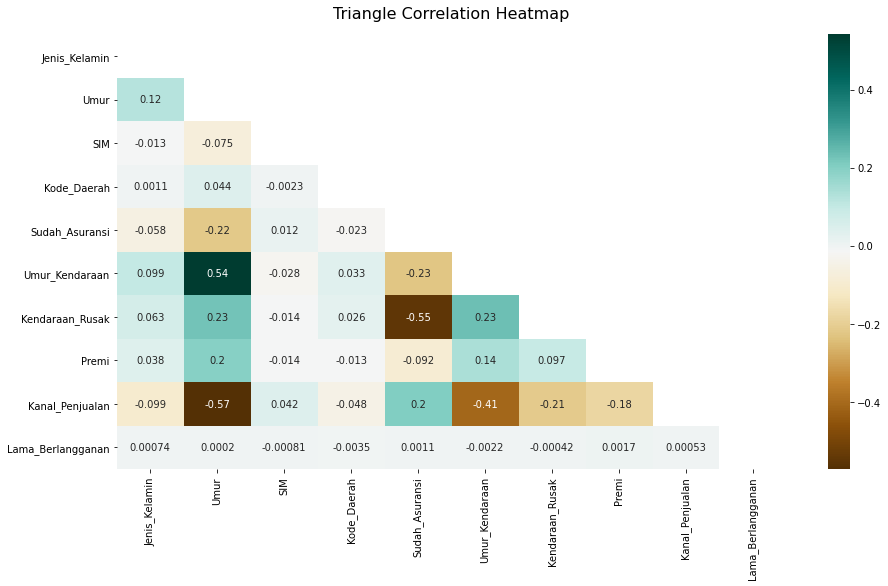

In [103]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

In [104]:
# Memilih Feature Berdasarkan Nilai Korelasi Tertinggi
df = df[['Umur', 'Kanal_Penjualan']]
df.head()

,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.015385,0.981481
3,0.461538,0.537037
4,0.015385,0.932099


In [105]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df))

Total Data : 230690


## **K-MEANS Algorithm**

In [106]:
# Mendefinisikan Metode Euclidean Untuk Perhitungan Jarak Dari Centroid
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))


def kmeans(k, max_iter, df):
    # Inisialisasi Dictionary Centroid
    centroid = {}
    
    # Memilih Centroid Secara Random Pada Data
    for c in range(k):
        rand = random.randint(0, len(df))
        centroid[c] = df[rand]


    for _ in range(max_iter):
        # Mendefinisikan Dictionary Cluster
        cluster = {}

        # Melakukan Set Setiap Index Pada Cluster Berisi Array kosong : []
        for i in range(k):
            cluster[i] = []

        # Mencari Nilai X dan Y Pada Data Untuk Setiap Centroid Menggunakan
        # Metode Euclidean Dan Memasukkannya Kedalam Dictionary Cluster
        for x in df:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            cluster[dist.index(min(dist))].append(x)

        # Mencari Nilai Centroid Dengan Mean Untuk Setiap Nilai Data
        # Cluster Yang Telah Dicari Sebelumnya
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)

    # Mengembalikan Nilai Dari Variabel Centroid Dan Cluster
    return centroid, cluster

## **Main Program**

In [109]:
# Merubah DataFrame Menjadi Numpy Array
data = df.to_numpy()

# Memasukkan Nilai K dan Maksimum Iterasi
k = 4
max_iter = 500

# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster = kmeans(k, max_iter, data)

## **Hasil Proses Cluster Final**

In [110]:
# Inisialisasi Array Untuk Dat Cluster
df = []

# Melakukan Perulangan Untuk Setiap Key Pada Data
# Hasil Proses K-Means Untuk Diinputkan Kedalam Arrray Cluster (df)
for key in cluster.keys():
    for c in cluster.get(key):
        df.append((c[0], c[1], key))

# Set Array df menjadi dataframe, Menamakan nama kolom dan menampilkannya
df = pd.DataFrame(df)
df.columns = ['Umur', 'Kanal_Penjualan', 'Cluster']
df.sample(10)

,Umur,Kanal_Penjualan,Cluster
110138,0.046154,0.932099,2
38356,0.369231,0.154321,1
39342,0.430769,0.154321,1
209754,0.476923,0.685318,3
182369,0.430769,0.759259,3
65164,0.289913,0.932099,2
17326,0.600000,0.154321,0
129430,0.046154,0.932099,2
153223,0.184615,0.938272,2
201659,0.276923,0.759259,3


In [111]:
# Menampilkan Letak Seluruh Centroids
for i in range(k):
    print('Centroid', i + 1, ':', centroid[i])

Centroid 1 : [0.66798187 0.15105811]
Centroid 2 : [0.33973745 0.15390448]
Centroid 3 : [0.09610791 0.91461042]
Centroid 4 : [0.46821319 0.77155158]


In [176]:
# Memetakkan Nilai X Dan Y Untuk Setiap Data Pada Dictionary Cluster
clusterize = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster.items()]))

# Membuat Nama Kolom Cluster Berdasarkan Jumlah Cluster Pada Clusterize
col = []
for i in range(len(clusterize.columns)):
    col.append('Cluster ' + str(i + 1))

# Melakukan Set Nama Kolom Dan Menampilkan Sample Data Cluster
clusterize.columns = col
clusterize.sample(8)


,Cluster 1,Cluster 2,Cluster 3,Cluster 4
49532,NaN,NaN,"[0.0153846153846153, 0.9814814814814814]","[0.3846153846153846, 0.7592592592592592]"
10346,"[0.7230769230769232, 0.074074074074074]","[0.2923076923076924, 0.3333333333333332]","[0.1384615384615384, 0.9444444444444444]","[0.4, 0.7592592592592592]"
28304,NaN,"[0.0615384615384615, 0.1543209876543209]","[0.0615384615384615, 0.9320987654320988]","[0.5230769230769231, 0.7592592592592592]"
42643,NaN,NaN,"[0.2307692307692308, 0.9320987654320988]","[0.3846153846153846, 0.7592592592592592]"
14330,"[0.5076923076923077, 0.1543209876543209]","[0.476923076923077, 0.1543209876543209]","[0.0, 0.9814814814814814]","[0.8, 0.7592592592592592]"
94096,NaN,NaN,"[0.0307692307692307, 0.9814814814814814]",NaN
112793,NaN,NaN,"[0.1846153846153846, 0.9320987654320988]",NaN
73936,NaN,NaN,"[0.0769230769230769, 0.9320987654320988]",NaN


## **Visualisasi Cluster**

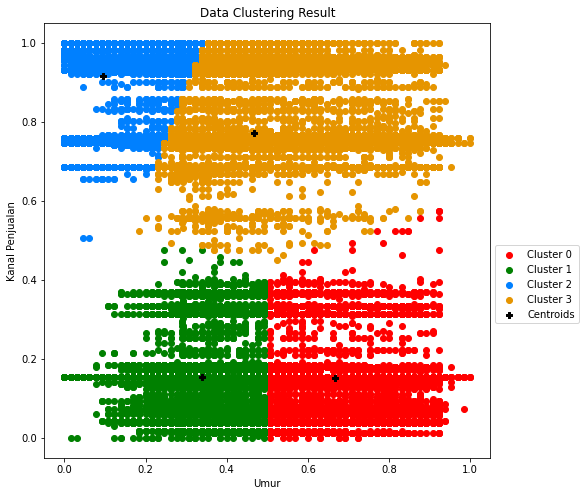

In [172]:
# Set Warna Setiap CLuster
colors = ['r', 'g', '#0080ff', '#e69500']

# Set Ukuran Dan Judul Plot
plt.figure(figsize=(8, 8))
plt.title('Data Clustering Result')

# Melakukan Looping Setiap Titik Data Dan Centroid
for i in range(k):
    plt.scatter(
        df.Umur[df['Cluster'] == i], 
        df['Kanal_Penjualan'][df['Cluster'] == i], 
        color=colors[i],
        label=f'Cluster {i}'
    )

    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')

# Acuan Penampilan Label Centroid
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')

# Set Nama Label X Dan Y Pada Plot Dan Set Tempat Legend Ditampilkan
plt.xlabel("Umur")
plt.ylabel("Kanal Penjualan")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


## **Evaluasi Model**

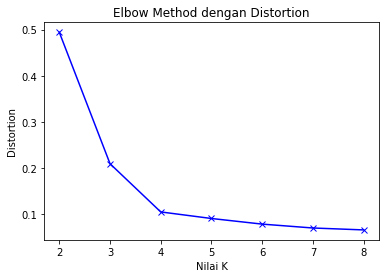

In [127]:
# Inisialisasi Array Untuk Distortion
distortions = []

# Inisialisasi Range K
K = range(2, 9)

# Melakukan Perulangan Untuk Setiap Range
for i in K:
    # Membangun Dan Fit Dataset
    model = KMeans(n_clusters=i).fit(df)
    model.fit(df)

    # Memasukkan Hasil Dari Jumlah cdist data, cluster_center Ke Array
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Distortion')
plt.title('Elbow Method dengan Distortion')
plt.show()